# Examen Final
El examen consistirá en preguntar teóricas y prácticas. Abarcará cada uno de los libros que se vieron durante el módulo. 

`lec01-ann`

`lec02-tf-keras`

`lec03-backpropagation`

`lec04-gradiente-descent`

`lec05-regularization`

`Clase CVA`

`lec06-convolutional`

`lec07-Recurrent Neural Network`

La **Evaluación del Examen** consistirá en lo siguiente: 
Del `lec01` a `lec05` el examen pesará 40% y el resto será 60%. 
La primer parte, donde está el 40% estará distribuido de la siguiente forma: 

`lec01-ann`: 8pts, 5 pts teóricos y 3 pts práctics

`lec02-tf-keras`: 8pts, 3 pts teóricos y 5pts prácticos

`lec03-backpropagation`: 8pts, 3 pts teóricos y 5pts prácticos

`lec04-gradiente-descent`:8pts, 3 pts teóricos y 5pts prácticos

`lec05-regularization`:8pts, 3 pts teóricos y 5pts prácticos

El 60% estará distribuido así: 

`Clase CVA` 30 pts: 5 pts teóricos, 25 pts prácticos. 

`lec06-convolutional`: 15 pts, 5 teóricos, 10 prácticos


`lec07-Recurrent Neural Network`: 15 pts, 5 teóricos, 10 prácticos


# `lec01-ann`

**Parte Teórica**
1. ¿Qué ventajas y desventajas encontraron al aprender Redes Neuronales versus los modelos que vimos en el Módulo 4? Lo que yo pude percatar es que sus ventajas también pueden ser desventajas. Aprendí que las redes neuronales neuronales pueden ser tan simples o tan complejas como uno decida, es muy custumizable, hay una infinadad de variantes que puede tener tanto la arquitectura como los parámetros que te puede ayudar a tener modelos más precisos, pero a la vez como en todo tiene el trade-off que el overfitting es un riesgo siempre latente, que existen métodos para mitigarlo pero aún así ahí esta, además que también el tiempo de cómputo de una red muy compleja puede que no justifique un mejor resultado.
2. ¿Las Redes Neuronales se usan para Regresión o Clasificación y por qué?
Las redes neutonales pueden ser utilizadas para regresión y clasificación
3. ¿Qué platicamos en la clase de Reinforcement Learning?
Es un algorítmo en el cual la computadora aprende por interacciones con el mismo algorítmo, lo corre y va aprendiendo del mismo en cada iteraciín
4. ¿Cuándo hace sentido usar una Red Neuronal para resolver un problema?
Cuando el problema no es lineal
5. Además del ejemplo del Portfolio Manager que vimos en clase/tarea1, ¿qué otro ejemplo en el sector financiero podrían aplicar redes? Para generar un modelo de crédito e identificar la posivilidad de incumplimento, para hacer etimasiones de variables económicas, un modelo más complejo podrías ser que en lugar de identificar imágenes, identifique gráficas del precio de un acción para hacer análisis técnico

**Parte Práctica**
1. En la clase, hicimos una superficie de costos para una red neuronal y 4 graficas en 2d: las interacción en parejas de los pesos. Eso lo hicimos para el vector `w2=randn(4,10)`. Ahora el ejercicio es graficar 4 interacciones pero de `w1=randn(1,4)`. Usen `seed=1`. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn, seed
import nn_utils

In [2]:
def nnet(x,W1,W2): return W2 @ sigmoid(W1@x)

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [36]:
seed(1)
nobs=1000
x=randn(4,nobs)
y=randn(1,nobs)

In [39]:
# 4 neuronas de la única capa
w1=randn(1,4)
#pesos de las 4 neuronas
w2=randn(1,1)


In [31]:
w1

array([[-0.59208728, -0.39687156, -2.40400039, -0.5455711 ]])

In [45]:
cuts=[((0,0),(0,2)),
     ((0,2),(0,1)),
     ((0,1),(0,0)),
     ((0,0),(0,3))]

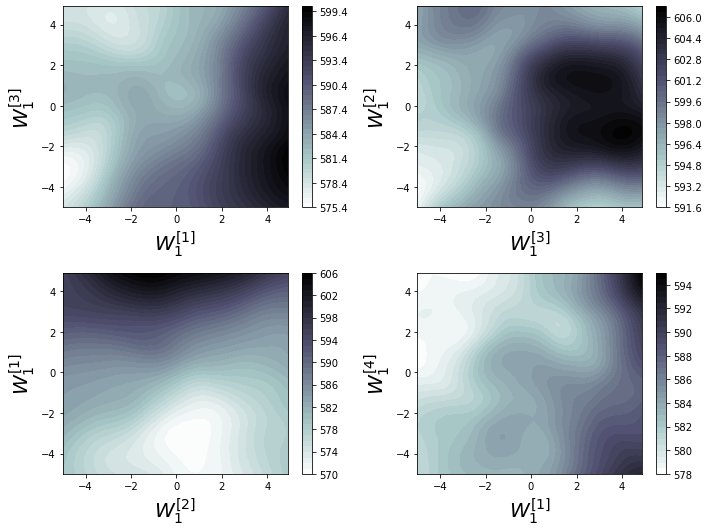

In [46]:
fig=plt.figure(figsize=(10,7.5))
for ix, cut in enumerate(cuts): 
    ax=fig.add_subplot(2,2,ix+1)
    p1,p2,J=nn_utils.loss_surface((x,w1,w2),(w1,w1),cut,nnet,y)
    plt.contourf(p1,p2,J,40,cmap="bone_r")
    (cut1_ix,cut1_layer),(cut2_ix,cut2_layer)=cut
    xlab="$W^{[" + f"{cut1_layer +1}" + "]}"+f"_{cut1_ix +1}$"   
    ylab="$W^{[" + f"{cut2_layer +1}" + "]}"+f"_{cut2_ix +1}$"
    plt.xlabel(xlab,fontsize=20)
    plt.ylabel(ylab,fontsize=20)
    plt.colorbar()
plt.tight_layout()

# `lec02-tf-keras`

**Parte Teórica**
1. ¿Qué diferencia hay del Descenso de Gradiente visto en el módulo 4 y el presentado en el módulo 5? En este módulo vimos diferentes variantes del descenso de gradiente estocático, teniendo dinamismo en el gradiente y el learning rate en lugar de dejarlo fijo como en el módulo 4 y diferentes formas de hacer los batches (online, mini-batch y online)
2. ¿Qué es eso del Mini-Batch, Batch, Online?
Se refiere a cómo realizas el descenso de gradiente, en el Online calcula el error  para cada observación y actualiza, en el Batch calcula el error para cada observación y actualiza hasta que termina con todas las observaciones y en el mini batch se divide el dataset en pequeños batches, calcula el error para cada mini batch y actualiza
3. ¿Qué tipo de Red Fue la que usamos en esa Clase? Vimos un Feed-Forward Neural Network
4. ¿Por qué usamos un Flatten() antes de usar las neuronas para clasificar las imágenes?
Para aplanar la base (dejarla en 1D) y así poderla pasar por el modelo
5. ¿Qué es SoftMax, Categorical_CrossEntropy y el famoso Bias?
El Softmax es una función de activación que te devuelve probabilidades se usa para la última capa en problemas de clasificación.
El categorical_crossentropy es la función de pérdida utilizada para problemas de clasificación, y el Bias es el sesgo/error.


**Parte Práctica**
1. Utilicen un Red Feed-Forward como la que vimos en clase para base de `cifar10` para clasificar esas imágenes. 

    1.1 Carguen Datos
    
    1.2 Normalicen Datos
    
    1.3 Definan Red (Libre Escoger el número de Capas, Neuronas, Funciones de Activación)
    
    1.4 Compilen red con SGD, Categorical_CrosEntropy y Accuracy
    
    1.5 Entrenen Red con 100 epochs. 
    
    1.6 Hagan un Cross-Validation de 5 Folds. Pueden usar la función desarrollada en clase o el wrapper de Keras. 
    
    1.7 Grafiquen las curvas de Aprendizaje

In [23]:
from tensorflow.keras.datasets import cifar10
import pandas as pd
import tensorflow as tf
import numpy as np
from numpy.random import seed, choice
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input,Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import KFold

In [50]:
  categories={
    0: "aviones",
    1: "coches",
    2: "aves",
    3: "gatos",
    4: "venados",
    5: "perros",
    6: "ranas",
    7: "caballos",
    8: "barcos",
    9: "camiones"}

In [5]:
def cargar_datos():
    #descargar datos
    (trainX,trainY),(testX,testY)=cifar10.load_data()
    #reshape para tener un único canal
    trainX=trainX.reshape((trainX.shape[0],32,32,3))
    testX=testX.reshape((testX.shape[0],32,32,3))
    #one hot encode target values
    #trainY=tf.keras.utils.to_categorical(trainY)
    #testY=tf.keras.utils.to_categorical(testY)
    return trainX, trainY, testX, testY
def escalar_imagenes(train,test):
    #convertir enteros a flotantes
    train_norm=train.astype('float32')
    test_norm=test.astype('float32')
    #normalizar a rango 0-1
    train_norm=train_norm/255.0
    test_norm=test_norm/255.0
    
    return train_norm, test_norm

def define_model():
    model=Sequential()
    model.add(Flatten())
    model.add(Dense(50,input_shape=(32,32,3),activation="sigmoid"))
   # model.add(Dense(200,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model
from sklearn.model_selection import StratifiedKFold
    
def evaluate_model(dataX,dataY,n_folds=5):
    #generamos 2 listas para el error y el accuracy
    scores,histories=list(),list()
    #preparar cross_validation
    stkfold=StratifiedKFold(n_folds,shuffle=True, random_state=1)
    # para cada fold
    for train_ix, test_ix in stkfold.split(dataX,dataY):
        #definimos model
        model=define_model()
        #seleccionamos filas para entrenar y testear
        trainX,trainY,testX,testY=dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        # fit model
        trainY=tf.keras.utils.to_categorical(trainY)
        testY=tf.keras.utils.to_categorical(testY)
        history=model.fit(trainX,trainY,epochs=100,batch_size=32,validation_data=(testX,testY),verbose=0)
        #evaluamos
        _, acc=model.evaluate(testX,testY,verbose=0)
        print('>%.3f'%(acc*100.0))
        scores.append(acc)
        histories.append(history)
    return scores,histories

def summarize_diagnostics(histories):
    for i in range(len(histories)):
            plt.subplot(211)
            plt.title('Classification Accuracy')
            plt.plot(histories[i].history['accuracy'], color='blue', label='train')
            plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()


def correr_todo():
    #cargue datos
    #trainX,trainY,testX,testY=cargar_datos()
    #escala
    #trainX,testX=escalar_imagenes(trainX,testX)
    #creamos modelo
    model=define_model()
    #evaluar modelo
    _,histories=evaluate_model(trainX,trainY)
    #graficar accuracy por epochs
    summarize_diagnostics(histories)

In [65]:
trainX,trainY,testX,testY=cargar_datos()
trainX,testX=escalar_imagenes(trainX,testX)

>48.690
>47.800
>48.300
>48.480
>48.110


<ipython-input-73-ef8b91b42b6e>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


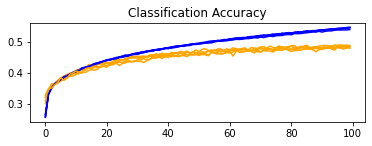

In [74]:
opt = SGD(lr=0.01)
correr_todo()

# `lec03-backpropagation`

**Parte Teórica**
1. ¿Qué es Backpropagation? Después de hacer un forward propagate y calcular el error se propaga el error hacia atrás ponderando con el pesos de los parámetros, para realizar el ajuste con el descenso de gradiente y volver a hacer el forward propagete.
2. ¿Cuál fue el objetivo de la clase de verlo como un diccionario cuando todo existe en Keras? El objetivo fue entender paso a paso como se va transmitiendo en cada capa y neurona y como va de regreso para ajustar en cada epoch, cosa que no se ve en las funciones de las librerías.
3. ¿Cuál es la diferencia entre Propagar hacia delante y Propagar el error? Son dos procesos complmentarios, al propagar hacia adelante, los inputs van recorriendo las capas y neuronas y ajustando los pesos por medio de las funciones de activación hasta llegar a la capa final donde se puede calcular el error ya con esto se propaga hacia atras ponderados por los pesos para volver a hacer el propagar hacia adelante.
4. ¿El ejemplo que vimos en clase fue un entrenamiento Online, Batch o Mini-Batch?¿Por qué? Fue online, porque actualizamos los pesos para cada fila
5. ¿Por qué vimos la derivada de la función de sigmoidal en la clase?
dado que era un problema de clasificación la utilizamos como función para hacer el descenso de gradiente
**Parte Práctica**
1. Utilicen la base de `iris` y repliquen el ejercicio con `diccionarios` que hicimos en esa clase. `from sklearn.datasets import load_iris`
    
    1.1 Dividir Base en 80% Train y 20% Test. `X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=.2,random_state=1)`

    1.2 Los parámetros del modelo serán learning_rate=.3,n_epochs=1000, n_hidden=7
    
    1.3 Prueben modelo en test. ¿Qué accuracy tiene? 
    98.7
    


In [75]:
from sklearn.datasets import load_iris
from random import seed 
from random import random
from math import exp
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import accuracy_score

In [99]:
X=load_iris()['data']
X1=X.tolist()

In [101]:
y=load_iris()['target']
y1=y.tolist()

In [104]:
X1[0]

[5.1, 3.5, 1.4, 0.2]

In [105]:
for i in range(len(y)):
    X1[i].append(y[i])
    

In [106]:
X1

[[5.1, 3.5, 1.4, 0.2, 0],
 [4.9, 3.0, 1.4, 0.2, 0],
 [4.7, 3.2, 1.3, 0.2, 0],
 [4.6, 3.1, 1.5, 0.2, 0],
 [5.0, 3.6, 1.4, 0.2, 0],
 [5.4, 3.9, 1.7, 0.4, 0],
 [4.6, 3.4, 1.4, 0.3, 0],
 [5.0, 3.4, 1.5, 0.2, 0],
 [4.4, 2.9, 1.4, 0.2, 0],
 [4.9, 3.1, 1.5, 0.1, 0],
 [5.4, 3.7, 1.5, 0.2, 0],
 [4.8, 3.4, 1.6, 0.2, 0],
 [4.8, 3.0, 1.4, 0.1, 0],
 [4.3, 3.0, 1.1, 0.1, 0],
 [5.8, 4.0, 1.2, 0.2, 0],
 [5.7, 4.4, 1.5, 0.4, 0],
 [5.4, 3.9, 1.3, 0.4, 0],
 [5.1, 3.5, 1.4, 0.3, 0],
 [5.7, 3.8, 1.7, 0.3, 0],
 [5.1, 3.8, 1.5, 0.3, 0],
 [5.4, 3.4, 1.7, 0.2, 0],
 [5.1, 3.7, 1.5, 0.4, 0],
 [4.6, 3.6, 1.0, 0.2, 0],
 [5.1, 3.3, 1.7, 0.5, 0],
 [4.8, 3.4, 1.9, 0.2, 0],
 [5.0, 3.0, 1.6, 0.2, 0],
 [5.0, 3.4, 1.6, 0.4, 0],
 [5.2, 3.5, 1.5, 0.2, 0],
 [5.2, 3.4, 1.4, 0.2, 0],
 [4.7, 3.2, 1.6, 0.2, 0],
 [4.8, 3.1, 1.6, 0.2, 0],
 [5.4, 3.4, 1.5, 0.4, 0],
 [5.2, 4.1, 1.5, 0.1, 0],
 [5.5, 4.2, 1.4, 0.2, 0],
 [4.9, 3.1, 1.5, 0.2, 0],
 [5.0, 3.2, 1.2, 0.2, 0],
 [5.5, 3.5, 1.3, 0.2, 0],
 [4.9, 3.6, 1.4, 0.1, 0],
 [4.4, 3.0, 

In [107]:
def initialize_network(n_inputs,n_hidden,n_outputs): 
    network=list()
    hidden_layer=[{'weights':[random() for i in range(n_inputs+1)]} for i in range(n_hidden)]
    network.append(hidden_layer)
    output_layer=[{'weights':[random() for i in range(n_hidden+1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network
def activate(weights,inputs):
    activation=weights[-1]
    for i in range(len(weights)-1):
        activation += weights[i] * inputs[i]
    return activation
def transfer(activation):
    return 1.0/(1.0+exp(-activation))
def forward_propagate(network,row):
    inputs=row
    for layer in network:
        new_inputs=[]
        for neuron in layer: 
            activation=activate(neuron['weights'],inputs)
            neuron['output']=transfer(activation)
            new_inputs.append(neuron['output'])
        inputs=new_inputs
    return inputs   
def transfer_derivative(output):
    return output*(1.0-output)
def backward_propagate_error(network,expected):
    for i in reversed(range(len(network))):
        layer=network[i]
        errors=list()
        #caso cuando no es la última
        if i != len(network)-1:
            for j in range(len(layer)):
                error=0.0
                for neuron in network[i+1]:
                    error += ( neuron['weights'][j] *neuron['delta'])
                errors.append(error)
        #caso cuando es la última 
        else: 
            for j in range(len(layer)):
                neuron=layer[j]
                errors.append(expected[j]-neuron['output'])
        
        #algo que aplique a las dos
        for j in range(len(layer)):
            neuron=layer[j]
            neuron['delta']=errors[j]*transfer_derivative(neuron['output'])
def update_weights(network,row,l_rate):
    for i in range(len(network)):
        inputs=row[:-1]
        #caso especial para la capa final donde el input es diferente
        if i == (len(network)-1): 
            inputs=[neuron['output'] for neuron in network[i-1]] 
       #aplica para todas capas
        for neuron in network[i]:
            for j in range(len(inputs)):
                neuron['weights'][j] += l_rate * neuron['delta'] * inputs[j]
            #bias
            neuron['weights'][-1] += l_rate * neuron['delta']*1
def train_network(network,train,l_rate,n_epoch,n_outputs):
    for epoch in range(n_epoch):
        sum_error=0
        for row in train: 
            #feed-forward
            outputs=forward_propagate(network,row)
            #one hot encoder de "y_true"
            expected=[0 for i in range(n_outputs)]
            expected[row[-1]]=1
            #ir viendo el error para cada epoch
            sum_error += sum([(expected[i]-outputs[i])**2 for i in range(len(expected))])
            #gradientes por neurona por backpropagation
            backward_propagate_error(network,expected)
            #actualizar los pesos
            update_weights(network,row,l_rate)
        print('>epoch=%d, larate=%.3f,error=%.3f' % (epoch,l_rate,sum_error))
def predict(network,row):
    outputs=forward_propagate(network,row)
    return outputs.index(max(outputs))

In [108]:
def evaluate_model(network,database,l_rate,n_epoch,n_outputs, n_folds=3):
    #generamos 2 listas para el error y el accuracy
    scores=list()
    #preparar cross_validation
    for i in range(n_folds):
        train,test = train_test_split(database, test_size=0.20)
       # train model
        history=train_network(network,train,l_rate,n_epoch,n_outputs)
       # predict 
        counters =[]
        for row in test:
            prediction=predict(network,row)
            real= row[-1]
            if prediction == real:
                counter=1
            else: counter =0
            counters.append(counter)
        #evaluamos
        acc= sum(counters)/len(counters)
        print('>%.3f'%(acc*100.0))
        scores.append(acc)
    mean_score=sum(scores)/len(scores)    
    return scores, mean_score

In [109]:
network=initialize_network(n_inputs=4,n_hidden=7,n_outputs=3)

In [110]:
scores, mean_score= evaluate_model(network,database=X1,l_rate=.3,n_epoch=1000,n_outputs=3, n_folds=5)

>epoch=0, larate=0.300,error=173.132
>epoch=1, larate=0.300,error=120.508
>epoch=2, larate=0.300,error=85.979
>epoch=3, larate=0.300,error=85.451
>epoch=4, larate=0.300,error=82.119
>epoch=5, larate=0.300,error=71.350
>epoch=6, larate=0.300,error=60.941
>epoch=7, larate=0.300,error=55.225
>epoch=8, larate=0.300,error=52.115
>epoch=9, larate=0.300,error=50.232
>epoch=10, larate=0.300,error=49.009
>epoch=11, larate=0.300,error=48.134
>epoch=12, larate=0.300,error=47.444
>epoch=13, larate=0.300,error=46.945
>epoch=14, larate=0.300,error=46.742
>epoch=15, larate=0.300,error=46.536
>epoch=16, larate=0.300,error=46.299
>epoch=17, larate=0.300,error=46.078
>epoch=18, larate=0.300,error=45.822
>epoch=19, larate=0.300,error=45.629
>epoch=20, larate=0.300,error=45.682
>epoch=21, larate=0.300,error=45.535
>epoch=22, larate=0.300,error=45.365
>epoch=23, larate=0.300,error=45.123
>epoch=24, larate=0.300,error=44.961
>epoch=25, larate=0.300,error=44.529
>epoch=26, larate=0.300,error=44.382
>epoch=27

>epoch=223, larate=0.300,error=13.729
>epoch=224, larate=0.300,error=8.175
>epoch=225, larate=0.300,error=8.487
>epoch=226, larate=0.300,error=10.303
>epoch=227, larate=0.300,error=8.508
>epoch=228, larate=0.300,error=10.605
>epoch=229, larate=0.300,error=12.036
>epoch=230, larate=0.300,error=13.348
>epoch=231, larate=0.300,error=5.828
>epoch=232, larate=0.300,error=5.411
>epoch=233, larate=0.300,error=7.861
>epoch=234, larate=0.300,error=10.602
>epoch=235, larate=0.300,error=8.188
>epoch=236, larate=0.300,error=18.347
>epoch=237, larate=0.300,error=8.484
>epoch=238, larate=0.300,error=11.796
>epoch=239, larate=0.300,error=7.227
>epoch=240, larate=0.300,error=15.515
>epoch=241, larate=0.300,error=11.504
>epoch=242, larate=0.300,error=13.154
>epoch=243, larate=0.300,error=5.657
>epoch=244, larate=0.300,error=8.206
>epoch=245, larate=0.300,error=12.195
>epoch=246, larate=0.300,error=8.300
>epoch=247, larate=0.300,error=12.376
>epoch=248, larate=0.300,error=8.315
>epoch=249, larate=0.300,

>epoch=517, larate=0.300,error=9.018
>epoch=518, larate=0.300,error=5.862
>epoch=519, larate=0.300,error=13.059
>epoch=520, larate=0.300,error=5.948
>epoch=521, larate=0.300,error=14.726
>epoch=522, larate=0.300,error=6.566
>epoch=523, larate=0.300,error=5.811
>epoch=524, larate=0.300,error=15.453
>epoch=525, larate=0.300,error=7.932
>epoch=526, larate=0.300,error=11.827
>epoch=527, larate=0.300,error=8.510
>epoch=528, larate=0.300,error=15.706
>epoch=529, larate=0.300,error=9.247
>epoch=530, larate=0.300,error=5.828
>epoch=531, larate=0.300,error=15.157
>epoch=532, larate=0.300,error=8.251
>epoch=533, larate=0.300,error=8.447
>epoch=534, larate=0.300,error=7.451
>epoch=535, larate=0.300,error=5.891
>epoch=536, larate=0.300,error=5.772
>epoch=537, larate=0.300,error=15.223
>epoch=538, larate=0.300,error=14.035
>epoch=539, larate=0.300,error=8.287
>epoch=540, larate=0.300,error=9.299
>epoch=541, larate=0.300,error=5.013
>epoch=542, larate=0.300,error=5.747
>epoch=543, larate=0.300,error

>epoch=773, larate=0.300,error=7.441
>epoch=774, larate=0.300,error=8.933
>epoch=775, larate=0.300,error=5.804
>epoch=776, larate=0.300,error=15.920
>epoch=777, larate=0.300,error=16.720
>epoch=778, larate=0.300,error=17.966
>epoch=779, larate=0.300,error=10.768
>epoch=780, larate=0.300,error=15.842
>epoch=781, larate=0.300,error=7.662
>epoch=782, larate=0.300,error=5.766
>epoch=783, larate=0.300,error=13.580
>epoch=784, larate=0.300,error=5.830
>epoch=785, larate=0.300,error=9.375
>epoch=786, larate=0.300,error=5.855
>epoch=787, larate=0.300,error=9.194
>epoch=788, larate=0.300,error=5.812
>epoch=789, larate=0.300,error=9.351
>epoch=790, larate=0.300,error=5.783
>epoch=791, larate=0.300,error=11.013
>epoch=792, larate=0.300,error=5.850
>epoch=793, larate=0.300,error=12.939
>epoch=794, larate=0.300,error=7.339
>epoch=795, larate=0.300,error=8.095
>epoch=796, larate=0.300,error=12.449
>epoch=797, larate=0.300,error=6.842
>epoch=798, larate=0.300,error=9.203
>epoch=799, larate=0.300,erro

>epoch=6, larate=0.300,error=9.663
>epoch=7, larate=0.300,error=12.615
>epoch=8, larate=0.300,error=7.027
>epoch=9, larate=0.300,error=12.760
>epoch=10, larate=0.300,error=8.783
>epoch=11, larate=0.300,error=9.475
>epoch=12, larate=0.300,error=9.399
>epoch=13, larate=0.300,error=8.879
>epoch=14, larate=0.300,error=7.668
>epoch=15, larate=0.300,error=9.099
>epoch=16, larate=0.300,error=11.287
>epoch=17, larate=0.300,error=7.095
>epoch=18, larate=0.300,error=8.750
>epoch=19, larate=0.300,error=7.882
>epoch=20, larate=0.300,error=10.838
>epoch=21, larate=0.300,error=5.753
>epoch=22, larate=0.300,error=8.639
>epoch=23, larate=0.300,error=10.372
>epoch=24, larate=0.300,error=8.058
>epoch=25, larate=0.300,error=10.711
>epoch=26, larate=0.300,error=8.213
>epoch=27, larate=0.300,error=7.802
>epoch=28, larate=0.300,error=8.641
>epoch=29, larate=0.300,error=8.988
>epoch=30, larate=0.300,error=6.952
>epoch=31, larate=0.300,error=9.608
>epoch=32, larate=0.300,error=9.114
>epoch=33, larate=0.300,er

>epoch=281, larate=0.300,error=8.482
>epoch=282, larate=0.300,error=8.482
>epoch=283, larate=0.300,error=13.428
>epoch=284, larate=0.300,error=13.514
>epoch=285, larate=0.300,error=9.311
>epoch=286, larate=0.300,error=8.023
>epoch=287, larate=0.300,error=5.647
>epoch=288, larate=0.300,error=10.831
>epoch=289, larate=0.300,error=11.375
>epoch=290, larate=0.300,error=5.558
>epoch=291, larate=0.300,error=14.347
>epoch=292, larate=0.300,error=8.837
>epoch=293, larate=0.300,error=8.405
>epoch=294, larate=0.300,error=5.694
>epoch=295, larate=0.300,error=11.992
>epoch=296, larate=0.300,error=10.138
>epoch=297, larate=0.300,error=10.116
>epoch=298, larate=0.300,error=11.304
>epoch=299, larate=0.300,error=12.488
>epoch=300, larate=0.300,error=8.612
>epoch=301, larate=0.300,error=8.483
>epoch=302, larate=0.300,error=11.573
>epoch=303, larate=0.300,error=8.099
>epoch=304, larate=0.300,error=11.517
>epoch=305, larate=0.300,error=11.332
>epoch=306, larate=0.300,error=12.641
>epoch=307, larate=0.300

>epoch=646, larate=0.300,error=10.197
>epoch=647, larate=0.300,error=5.664
>epoch=648, larate=0.300,error=9.521
>epoch=649, larate=0.300,error=5.722
>epoch=650, larate=0.300,error=11.376
>epoch=651, larate=0.300,error=5.504
>epoch=652, larate=0.300,error=12.367
>epoch=653, larate=0.300,error=5.585
>epoch=654, larate=0.300,error=9.917
>epoch=655, larate=0.300,error=5.621
>epoch=656, larate=0.300,error=10.753
>epoch=657, larate=0.300,error=5.771
>epoch=658, larate=0.300,error=12.639
>epoch=659, larate=0.300,error=7.996
>epoch=660, larate=0.300,error=5.808
>epoch=661, larate=0.300,error=9.672
>epoch=662, larate=0.300,error=7.889
>epoch=663, larate=0.300,error=7.441
>epoch=664, larate=0.300,error=5.699
>epoch=665, larate=0.300,error=10.721
>epoch=666, larate=0.300,error=7.856
>epoch=667, larate=0.300,error=7.539
>epoch=668, larate=0.300,error=5.761
>epoch=669, larate=0.300,error=10.839
>epoch=670, larate=0.300,error=5.619
>epoch=671, larate=0.300,error=7.935
>epoch=672, larate=0.300,error=

>epoch=997, larate=0.300,error=5.681
>epoch=998, larate=0.300,error=5.875
>epoch=999, larate=0.300,error=6.519
>100.000
>epoch=0, larate=0.300,error=4.941
>epoch=1, larate=0.300,error=5.716
>epoch=2, larate=0.300,error=6.043
>epoch=3, larate=0.300,error=6.323
>epoch=4, larate=0.300,error=7.143
>epoch=5, larate=0.300,error=5.892
>epoch=6, larate=0.300,error=5.765
>epoch=7, larate=0.300,error=6.330
>epoch=8, larate=0.300,error=6.138
>epoch=9, larate=0.300,error=6.085
>epoch=10, larate=0.300,error=3.973
>epoch=11, larate=0.300,error=5.854
>epoch=12, larate=0.300,error=5.641
>epoch=13, larate=0.300,error=6.455
>epoch=14, larate=0.300,error=5.370
>epoch=15, larate=0.300,error=5.837
>epoch=16, larate=0.300,error=3.915
>epoch=17, larate=0.300,error=5.632
>epoch=18, larate=0.300,error=5.462
>epoch=19, larate=0.300,error=5.535
>epoch=20, larate=0.300,error=6.010
>epoch=21, larate=0.300,error=5.685
>epoch=22, larate=0.300,error=6.162
>epoch=23, larate=0.300,error=5.372
>epoch=24, larate=0.300,er

>epoch=234, larate=0.300,error=3.492
>epoch=235, larate=0.300,error=3.492
>epoch=236, larate=0.300,error=3.491
>epoch=237, larate=0.300,error=3.491
>epoch=238, larate=0.300,error=3.491
>epoch=239, larate=0.300,error=3.491
>epoch=240, larate=0.300,error=3.490
>epoch=241, larate=0.300,error=3.490
>epoch=242, larate=0.300,error=3.490
>epoch=243, larate=0.300,error=3.489
>epoch=244, larate=0.300,error=3.489
>epoch=245, larate=0.300,error=3.489
>epoch=246, larate=0.300,error=3.489
>epoch=247, larate=0.300,error=3.488
>epoch=248, larate=0.300,error=3.488
>epoch=249, larate=0.300,error=3.488
>epoch=250, larate=0.300,error=3.487
>epoch=251, larate=0.300,error=3.487
>epoch=252, larate=0.300,error=3.487
>epoch=253, larate=0.300,error=3.487
>epoch=254, larate=0.300,error=3.486
>epoch=255, larate=0.300,error=3.486
>epoch=256, larate=0.300,error=3.486
>epoch=257, larate=0.300,error=3.485
>epoch=258, larate=0.300,error=3.485
>epoch=259, larate=0.300,error=3.485
>epoch=260, larate=0.300,error=3.485
>

>epoch=466, larate=0.300,error=3.442
>epoch=467, larate=0.300,error=3.442
>epoch=468, larate=0.300,error=3.442
>epoch=469, larate=0.300,error=3.441
>epoch=470, larate=0.300,error=3.441
>epoch=471, larate=0.300,error=3.441
>epoch=472, larate=0.300,error=3.441
>epoch=473, larate=0.300,error=3.440
>epoch=474, larate=0.300,error=3.440
>epoch=475, larate=0.300,error=3.440
>epoch=476, larate=0.300,error=3.440
>epoch=477, larate=0.300,error=3.439
>epoch=478, larate=0.300,error=3.439
>epoch=479, larate=0.300,error=3.439
>epoch=480, larate=0.300,error=3.439
>epoch=481, larate=0.300,error=3.438
>epoch=482, larate=0.300,error=3.438
>epoch=483, larate=0.300,error=3.438
>epoch=484, larate=0.300,error=3.438
>epoch=485, larate=0.300,error=3.437
>epoch=486, larate=0.300,error=3.437
>epoch=487, larate=0.300,error=3.437
>epoch=488, larate=0.300,error=3.436
>epoch=489, larate=0.300,error=3.436
>epoch=490, larate=0.300,error=3.436
>epoch=491, larate=0.300,error=3.436
>epoch=492, larate=0.300,error=3.435
>

>epoch=778, larate=0.300,error=3.346
>epoch=779, larate=0.300,error=3.346
>epoch=780, larate=0.300,error=3.346
>epoch=781, larate=0.300,error=3.346
>epoch=782, larate=0.300,error=3.346
>epoch=783, larate=0.300,error=3.346
>epoch=784, larate=0.300,error=3.346
>epoch=785, larate=0.300,error=3.345
>epoch=786, larate=0.300,error=3.345
>epoch=787, larate=0.300,error=3.345
>epoch=788, larate=0.300,error=3.345
>epoch=789, larate=0.300,error=3.345
>epoch=790, larate=0.300,error=3.345
>epoch=791, larate=0.300,error=3.345
>epoch=792, larate=0.300,error=3.345
>epoch=793, larate=0.300,error=3.345
>epoch=794, larate=0.300,error=3.345
>epoch=795, larate=0.300,error=3.345
>epoch=796, larate=0.300,error=3.345
>epoch=797, larate=0.300,error=3.345
>epoch=798, larate=0.300,error=3.345
>epoch=799, larate=0.300,error=3.345
>epoch=800, larate=0.300,error=3.345
>epoch=801, larate=0.300,error=3.345
>epoch=802, larate=0.300,error=3.345
>epoch=803, larate=0.300,error=3.345
>epoch=804, larate=0.300,error=3.345
>

>epoch=5, larate=0.300,error=10.031
>epoch=6, larate=0.300,error=6.208
>epoch=7, larate=0.300,error=5.365
>epoch=8, larate=0.300,error=5.750
>epoch=9, larate=0.300,error=4.302
>epoch=10, larate=0.300,error=6.666
>epoch=11, larate=0.300,error=6.849
>epoch=12, larate=0.300,error=3.772
>epoch=13, larate=0.300,error=8.928
>epoch=14, larate=0.300,error=6.217
>epoch=15, larate=0.300,error=6.867
>epoch=16, larate=0.300,error=6.049
>epoch=17, larate=0.300,error=5.650
>epoch=18, larate=0.300,error=5.686
>epoch=19, larate=0.300,error=5.645
>epoch=20, larate=0.300,error=5.546
>epoch=21, larate=0.300,error=6.786
>epoch=22, larate=0.300,error=5.308
>epoch=23, larate=0.300,error=5.945
>epoch=24, larate=0.300,error=4.928
>epoch=25, larate=0.300,error=3.814
>epoch=26, larate=0.300,error=6.330
>epoch=27, larate=0.300,error=3.852
>epoch=28, larate=0.300,error=5.802
>epoch=29, larate=0.300,error=10.518
>epoch=30, larate=0.300,error=8.615
>epoch=31, larate=0.300,error=3.923
>epoch=32, larate=0.300,error=5

>epoch=260, larate=0.300,error=3.846
>epoch=261, larate=0.300,error=3.800
>epoch=262, larate=0.300,error=4.535
>epoch=263, larate=0.300,error=3.790
>epoch=264, larate=0.300,error=6.838
>epoch=265, larate=0.300,error=5.729
>epoch=266, larate=0.300,error=6.736
>epoch=267, larate=0.300,error=5.957
>epoch=268, larate=0.300,error=6.866
>epoch=269, larate=0.300,error=5.495
>epoch=270, larate=0.300,error=6.820
>epoch=271, larate=0.300,error=5.366
>epoch=272, larate=0.300,error=6.906
>epoch=273, larate=0.300,error=3.751
>epoch=274, larate=0.300,error=4.682
>epoch=275, larate=0.300,error=3.797
>epoch=276, larate=0.300,error=4.271
>epoch=277, larate=0.300,error=3.775
>epoch=278, larate=0.300,error=3.353
>epoch=279, larate=0.300,error=4.046
>epoch=280, larate=0.300,error=4.108
>epoch=281, larate=0.300,error=3.762
>epoch=282, larate=0.300,error=3.350
>epoch=283, larate=0.300,error=4.022
>epoch=284, larate=0.300,error=4.338
>epoch=285, larate=0.300,error=3.706
>epoch=286, larate=0.300,error=6.910
>

>epoch=495, larate=0.300,error=3.242
>epoch=496, larate=0.300,error=3.543
>epoch=497, larate=0.300,error=4.498
>epoch=498, larate=0.300,error=3.608
>epoch=499, larate=0.300,error=4.203
>epoch=500, larate=0.300,error=3.798
>epoch=501, larate=0.300,error=3.514
>epoch=502, larate=0.300,error=3.316
>epoch=503, larate=0.300,error=4.066
>epoch=504, larate=0.300,error=3.546
>epoch=505, larate=0.300,error=3.708
>epoch=506, larate=0.300,error=3.626
>epoch=507, larate=0.300,error=3.763
>epoch=508, larate=0.300,error=3.390
>epoch=509, larate=0.300,error=3.104
>epoch=510, larate=0.300,error=3.001
>epoch=511, larate=0.300,error=4.824
>epoch=512, larate=0.300,error=3.184
>epoch=513, larate=0.300,error=4.716
>epoch=514, larate=0.300,error=5.522
>epoch=515, larate=0.300,error=4.401
>epoch=516, larate=0.300,error=3.126
>epoch=517, larate=0.300,error=4.655
>epoch=518, larate=0.300,error=3.103
>epoch=519, larate=0.300,error=5.508
>epoch=520, larate=0.300,error=6.729
>epoch=521, larate=0.300,error=6.165
>

>epoch=730, larate=0.300,error=4.043
>epoch=731, larate=0.300,error=3.772
>epoch=732, larate=0.300,error=3.432
>epoch=733, larate=0.300,error=4.265
>epoch=734, larate=0.300,error=3.755
>epoch=735, larate=0.300,error=3.310
>epoch=736, larate=0.300,error=4.216
>epoch=737, larate=0.300,error=3.656
>epoch=738, larate=0.300,error=3.205
>epoch=739, larate=0.300,error=2.736
>epoch=740, larate=0.300,error=2.629
>epoch=741, larate=0.300,error=3.571
>epoch=742, larate=0.300,error=4.361
>epoch=743, larate=0.300,error=3.827
>epoch=744, larate=0.300,error=3.726
>epoch=745, larate=0.300,error=3.049
>epoch=746, larate=0.300,error=2.663
>epoch=747, larate=0.300,error=3.182
>epoch=748, larate=0.300,error=2.750
>epoch=749, larate=0.300,error=2.570
>epoch=750, larate=0.300,error=4.191
>epoch=751, larate=0.300,error=3.886
>epoch=752, larate=0.300,error=3.864
>epoch=753, larate=0.300,error=3.838
>epoch=754, larate=0.300,error=3.785
>epoch=755, larate=0.300,error=3.504
>epoch=756, larate=0.300,error=2.713
>

>epoch=26, larate=0.300,error=3.790
>epoch=27, larate=0.300,error=3.781
>epoch=28, larate=0.300,error=3.761
>epoch=29, larate=0.300,error=3.705
>epoch=30, larate=0.300,error=3.618
>epoch=31, larate=0.300,error=3.409
>epoch=32, larate=0.300,error=4.586
>epoch=33, larate=0.300,error=3.912
>epoch=34, larate=0.300,error=3.828
>epoch=35, larate=0.300,error=3.818
>epoch=36, larate=0.300,error=3.809
>epoch=37, larate=0.300,error=3.798
>epoch=38, larate=0.300,error=3.781
>epoch=39, larate=0.300,error=3.746
>epoch=40, larate=0.300,error=3.625
>epoch=41, larate=0.300,error=3.952
>epoch=42, larate=0.300,error=2.878
>epoch=43, larate=0.300,error=3.948
>epoch=44, larate=0.300,error=6.585
>epoch=45, larate=0.300,error=5.508
>epoch=46, larate=0.300,error=3.849
>epoch=47, larate=0.300,error=3.807
>epoch=48, larate=0.300,error=3.782
>epoch=49, larate=0.300,error=3.707
>epoch=50, larate=0.300,error=3.809
>epoch=51, larate=0.300,error=3.659
>epoch=52, larate=0.300,error=4.060
>epoch=53, larate=0.300,erro

>epoch=372, larate=0.300,error=3.600
>epoch=373, larate=0.300,error=3.447
>epoch=374, larate=0.300,error=3.974
>epoch=375, larate=0.300,error=3.743
>epoch=376, larate=0.300,error=4.876
>epoch=377, larate=0.300,error=5.502
>epoch=378, larate=0.300,error=3.852
>epoch=379, larate=0.300,error=3.830
>epoch=380, larate=0.300,error=3.819
>epoch=381, larate=0.300,error=3.801
>epoch=382, larate=0.300,error=3.762
>epoch=383, larate=0.300,error=3.635
>epoch=384, larate=0.300,error=3.955
>epoch=385, larate=0.300,error=2.620
>epoch=386, larate=0.300,error=3.873
>epoch=387, larate=0.300,error=3.848
>epoch=388, larate=0.300,error=3.833
>epoch=389, larate=0.300,error=3.822
>epoch=390, larate=0.300,error=3.812
>epoch=391, larate=0.300,error=3.800
>epoch=392, larate=0.300,error=3.783
>epoch=393, larate=0.300,error=3.749
>epoch=394, larate=0.300,error=3.635
>epoch=395, larate=0.300,error=4.038
>epoch=396, larate=0.300,error=2.389
>epoch=397, larate=0.300,error=3.728
>epoch=398, larate=0.300,error=3.566
>

>epoch=751, larate=0.300,error=1.987
>epoch=752, larate=0.300,error=1.987
>epoch=753, larate=0.300,error=1.987
>epoch=754, larate=0.300,error=1.987
>epoch=755, larate=0.300,error=1.986
>epoch=756, larate=0.300,error=1.986
>epoch=757, larate=0.300,error=1.986
>epoch=758, larate=0.300,error=1.986
>epoch=759, larate=0.300,error=1.986
>epoch=760, larate=0.300,error=1.986
>epoch=761, larate=0.300,error=1.986
>epoch=762, larate=0.300,error=1.986
>epoch=763, larate=0.300,error=1.986
>epoch=764, larate=0.300,error=1.986
>epoch=765, larate=0.300,error=1.986
>epoch=766, larate=0.300,error=1.986
>epoch=767, larate=0.300,error=1.986
>epoch=768, larate=0.300,error=1.986
>epoch=769, larate=0.300,error=1.986
>epoch=770, larate=0.300,error=1.986
>epoch=771, larate=0.300,error=1.986
>epoch=772, larate=0.300,error=1.986
>epoch=773, larate=0.300,error=1.986
>epoch=774, larate=0.300,error=1.986
>epoch=775, larate=0.300,error=1.986
>epoch=776, larate=0.300,error=1.986
>epoch=777, larate=0.300,error=1.986
>

In [111]:
scores, mean_score

([1.0, 1.0, 1.0, 1.0, 0.9333333333333333], 0.9866666666666667)

# `lec04-gradiente-descent`

**Parte Teórica**
1. ¿Cuáles son los componentes del Descenso de Gradiente? Tasa de aprendizaje y gradiente
2. ¿Por qué es importante estudiar el Descenso de Gradiente en Redes Neuronales? Porque para llegar al resultado óptimo el poder ir ajustantado estos dos componentes a la hora de hacer el backpropagation en cada epoch se vuelve fundamental
3. ¿Cuáles son las dos vertientes que analizamos en clase?
Ajustar la tasa de aprendizaje (AdaGrad) o el gradiente (Momentum) y de ahì se derivab otra que inclusive ajustan ambas.
4. ¿Por qué creen que ha existido la necesidad de incorporar esos 10 métodos que vimos si con SGD debería ser suficiente? Porque dependiendo el problema toma relvancia cual de las vertientes tomar y en qué magnitud, por eso es que se han tenido que modificar las ya existentes


**Parte Práctica**
1. Correr la Red Neuronal de `lec02-tf-keras` de este examen ahora utilizando 3 métodos que puedan mejorar el accuracy. ¿Se mejoró el Accuracy en el Cross-Validation y por qué creen? No se mejoró, quizás había que buscar otros métodos

In [123]:
trainX

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [114]:
trainX,trainY,testX,testY=cargar_datos()
trainX,testX=escalar_imagenes(trainX,testX)

In [126]:
from tensorflow.keras.optimizers import Adam


>43.920
>40.830
>40.870
>41.260
>41.250


<ipython-input-121-bce0885a875e>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


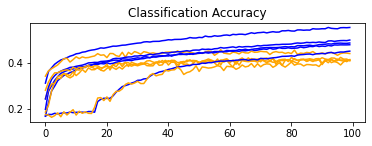

In [127]:
opt = Adam(lr=0.001,amsgrad=True)
correr_todo()

In [128]:
from tensorflow.keras.optimizers import Adagrad

>38.130
>39.140
>38.670
>39.000
>39.110


<ipython-input-121-bce0885a875e>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


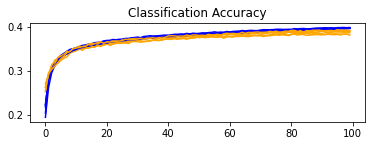

In [129]:
opt = Adagrad(lr=0.001)
correr_todo()

>48.550
>47.950
>47.980
>48.700
>47.080


<ipython-input-121-bce0885a875e>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


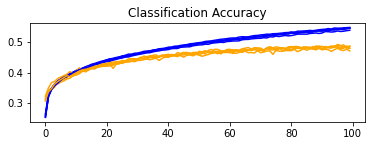

In [131]:
opt = SGD(lr=0.001,momentum=.9)
correr_todo()

# `lec05-regularization`

**Parte Teórica**
1. ¿Por qué es importante regularización en Redes Neuronales?
Ya que las redes neuronales pueden ser modelos muy complejos se recomienda hacer una regularización para evitar un overfitting
2. ¿Por qué disminuir los pesos de la Red es bueno? Es una forma de penalizar variables cuando se tienen muchas y quieres quitar a las ue no son tan relevantes y con esto tener un mejor entrenamiento del modelo 
3. ¿Cúal es el enfoque Clásico, Alternativo y Moderno?
El clásico utiliza Finalizar antes y weight decay, el alternativo finalizar antes y agregar ruido a los pesos y el moderno finalizar antes, dropout y weight constraint
4. ¿Qué es Dropout y por qué lleva una regularización estricta de la mano?
El Dropout entrena el modelo tirando/ignorando ciertas capas de manera aleatoria y corriendo el modelo varias veces, al final el resultado es el promedio de todas las repeticiones. Este debe llevar una regularización de los pesos porque el modelo por cómo funciona deja algunos muy altos y es necesario reescalar.
5. ¿Qué norma se recomienda más Norma 1, Norma 2 o una combinación de las dos? La norma elástica
6. ¿Qué es eso de Finalizar Antes?
Monitorear el desempeño del entrenamiento durante los epochs y pararlo cuando el desempeño caiga

**Parte Práctico**
1. Correr la Red Neuronal de `lec02-tf-keras` de este examen ahora utilizando: 

    1.1 Utilizando el enfoque Clásico. ¿Qué agregaron? ¿mejoró el accuración en el Cross-Validation? Agregué un kernel_regularizer=l2 (norma 2). En promedio mejoró en el cross-validation
 
    1.2 Utilizando el enfoque Moderno ¿Qué agreagron? ¿mejoró el accuracay?
    Un dropout y kernel_constraint, fue mejor  con el enfoque clásico.
    
    1.3 ¿Recomiendan Finalizar Antes de los 100 epochs?
    No recomiendo parar antes de los 100 epcohs, pues la gráfica muestra tendencia a la alza


In [132]:
from tensorflow.keras.regularizers import l2

In [133]:
trainX,trainY,testX,testY=cargar_datos()
trainX,testX=escalar_imagenes(trainX,testX)

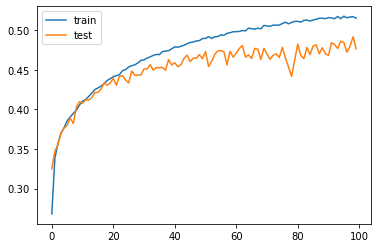

In [137]:
#Enfoque clásico
model=Sequential()
model.add(Flatten())
model.add(Dense(50,input_shape=(32,32,3),activation="sigmoid",kernel_regularizer=l2(.001)))
# model.add(Dense(200,activation="relu"))
model.add(Dense(10,activation="softmax"))
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
trainY=tf.keras.utils.to_categorical(trainY)
testY=tf.keras.utils.to_categorical(testY)
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,verbose=0)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

>48.300
>48.630
>48.190
>48.630
>48.260


<ipython-input-121-bce0885a875e>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


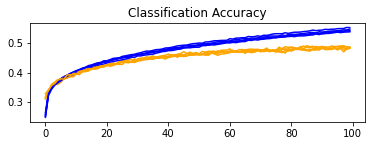

In [140]:
trainX,trainY,testX,testY=cargar_datos()
trainX,testX=escalar_imagenes(trainX,testX)
model=Sequential()
model.add(Flatten())
model.add(Dense(50,input_shape=(32,32,3),activation="sigmoid",kernel_regularizer=l2(.001)))
# model.add(Dense(200,activation="relu"))
model.add(Dense(10,activation="softmax"))
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
_,histories=evaluate_model(trainX,trainY)
    #graficar accuracy por epochs
summarize_diagnostics(histories)

In [142]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm

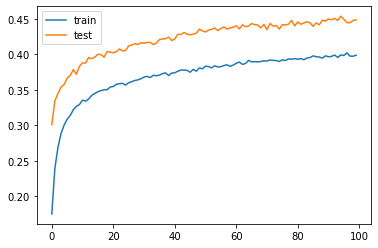

In [143]:
#dropout
model=Sequential()
model.add(Flatten())
model.add(Dense(50,input_shape=(32,32,3),activation="sigmoid",kernel_constraint=MaxNorm(3)))
# model.add(Dense(200,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
trainY=tf.keras.utils.to_categorical(trainY)
testY=tf.keras.utils.to_categorical(testY)
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=100,verbose=0)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

>48.920
>47.880
>48.670
>48.410
>47.440


<ipython-input-121-bce0885a875e>:56: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


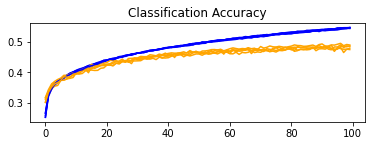

In [144]:
trainX,trainY,testX,testY=cargar_datos()
trainX,testX=escalar_imagenes(trainX,testX)
model=Sequential()
model.add(Flatten())
model.add(Dense(50,input_shape=(32,32,3),activation="sigmoid",kernel_constraint=MaxNorm(3)))
# model.add(Dense(200,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
opt = SGD(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

_,histories=evaluate_model(trainX,trainY)
    #graficar accuracy por epochs
summarize_diagnostics(histories)

# `Clase CVA`

**Parte Teórica**
1. ¿Qué es el CVA? Es el preico que se le asgina al riesgo de incumplimiento cuando se cierra un derivado con una contraparte.
2. ¿Por qué usaron Monte Carlo para calcularlo?
Para poder tomar en cuenta diferentes escenarios durante un plazo determinado
3. ¿Cómo obtuvieron la Probabilidad Acumulada de Incumplimiento? Primero tuvimos que encontrar la delta que llevara a cero la diferencia entre el precio risky y el precio sucio, luego para cada periodo elevamos al t (1- delta) y la probabilidad acumulada para cada periodo es 1 - (1-delta)^t
4. ¿Qué diferencia hay entre la Probabilidad Acumulada de Incumplimiento y la Probabilidad Condicional que calcularon? La probabilidad acumulada toma en cuenta la probabilidad de incumplimiento del periodo pasado y la acumula y en la condicional es nada más la probabilidad para un periodo en específico

**Parte Práctico**
1. Utilicen una Red Neuronal para obtener el CVA. 
    1.1 Crear Base de Datos con 100 registros. Esta parte la pueden hacer en Excel o en Python. Las variables que estaremos usando para la Red Neuornal serán `Tasa de Rendimiento: celda B8 hoja prob incum`, `Volatilidad Implicita Celda B11 hoja montecarlo-cva` y `Puntos Forward celda b5 hoja montecarlo-cva` 
    1.2 Vamos a suponer 10 emisores diferentes. Es decir 100 `Tasas de Rendimiento`. Esos 10 emisores tendrán diferentes CVAs de acuerdo a diferentes `Volatilidades` y `Puntos Forward`. El CVA para cada uno de los 100 registros será calculado con todas las demás variables constantes de su libro de Excel que vieron en clase. 
    1.3 `Tasas de Rendimient`: De 4.76% a 5.66% en incrementos de 0.10%. Es decir, 10 tasas diferentes. 
    1.4 Esas 10 tasas diferentes tendrán 10 parejas diferentes de valores de `Volatilidades` y `Puntos Forward`. Es decir serán 100x10=1000 registros. Las parejas diferentes de iniciaran cada una de la siguiente forma: `Volatilidades` de 11% a 20% en incrementos de 1%. Para los `Puntos Forward` de 1,637 a 2,537 en incrementos de 100.
    
    1.5 Ejemplo 
    
    
    1. Tasa:4.76%----Vol:11%----Pts Fwd:1637
    2. Tasa:4.76%----Vol:12%----Pts Fwd:1737
    3. Tasa:4.76%----Vol:13%----Pts Fwd:1837
    ...
    10. Tasa 4.76%---Vol:20%----Pts Fwd:2537
    
    
    
    
    11. Tasa:4.86%----Vol:11%----Pts Fwd:1637
    12. Tasa:4.86%----Vol:12%----Pts Fwd:1737
    13. Tasa:4.86%----Vol:13%----Pts Fwd:1837
    ...
    20. Tasa 4.86%---Vol:20%----Pts Fwd:2537
    
    
    
    
    91. Tasa:5.66%----Vol:10%----Pts Fwd:1537
    92. Tasa:5.66%----Vol:11%----Pts Fwd:1637
    93. Tasa:5.66%----Vol:12%----Pts Fwd:1737
    ...
    100. Tasa 5.66%---Vol:20%----Pts Fwd:2537
    
    
    
    
 
2. Para los 100 registros anteriores calculen su CVA


3. Propongan una Red Neuronal Feed-Forward y Calculen un Cross-Validation con 10 Folds. Utilicen 10,000 epochs. 



4.  Reportel el Accuracy Promedio con 10 Folds



5.  ¿Por qué creen que tuvieron ese accuracy promedio?
100 registros es una muestra muy pobre para resolver un problema tan complejo
 
  

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

In [52]:
base=pd.read_csv('base_cva.csv')

In [53]:
base.head()

,Tasa_rendimiento,Volatilidad,Ptos_Fwd,CVA
0,0.0476,0.11,1637.0,45694.557435
1,0.0476,0.12,1737.0,49580.155257
2,0.0476,0.13,1837.0,50801.344985
3,0.0476,0.14,1937.0,57831.758460
4,0.0476,0.15,2037.0,57009.306389


In [54]:
base2 = base.iloc[:,:].astype('float32')
    

In [55]:
base2

,Tasa_rendimiento,Volatilidad,Ptos_Fwd,CVA
0,0.0476,0.11,1637.0,45694.558594
1,0.0476,0.12,1737.0,49580.156250
2,0.0476,0.13,1837.0,50801.343750
3,0.0476,0.14,1937.0,57831.757812
4,0.0476,0.15,2037.0,57009.304688
...,...,...,...,...
95,0.0566,0.16,2137.0,62333.722656
96,0.0566,0.17,2237.0,72797.359375
97,0.0566,0.18,2337.0,74307.125000
98,0.0566,0.19,2437.0,80429.460938


In [41]:
base.iloc[:,[3]]

,CVA
0,44577.92
1,45941.45
2,52645.67
3,53264.03
4,58947.64
...,...
95,61002.17
96,70832.17
97,69396.53
98,80670.50


In [56]:
trainX,testX,trainY,testY=train_test_split(base.iloc[:,:3],base.iloc[:,[3]],test_size=.2,random_state=1)

In [67]:
def modelo_cva(): 
        model=Sequential()
        model.add(Dense(100,input_dim=3,activation="relu"))
        model.add(Dense(1,activation="linear"))
        model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_absolute_error'])
        return model


In [70]:
estimators=[]
estimators.append(('strandarize',StandardScaler()))
estimators.append(('mlp',KerasClassifier(build_fn=modelo_cva,epochs=10000,batch_size=32,verbose=0)))
pipeline=Pipeline(estimators)
kfold=KFold(10,shuffle=True,random_state=1)
resultados=cross_val_score(pipeline,trainX,trainY,cv=kfold,scoring='neg_mean_absolute_error')

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [72]:
resultados.mean()

-21171.239820104664

# `lec06-convolutional`

**Parte Teórica**
1. ¿Qué es una Red Convolutional?
Es una red donde se le aplica un filtro al input para obtener un mapa (feature map) donde vienen las características del input. Este mapa ayuda a no perder la estructura espacial como en la feed-forward que se tiene que aplanar
2. ¿Cuál es la estructura en cuanto a capas de una red CNN?
Tiene la convutional layer que es donde se generan los mapas, la pooling que consolida las convutional layer, ayuda a evitar overfitting y por último las feed-forward que son utilizadas para hacer la predicción
3. ¿Qué es un Feature Map? Es un mapa donde se alamcenan las características predominantes del input
4. ¿Qué beneficio encuentran de Anidar Capas Convolucionales? Ayuda a obtener diferentes características del input
5. ¿Por qué la última Capa es Dense? Porque es la capa que se utiliza para realizar la predicción

**Parte Práctica**
1. Propongan una Red Convolucional con mejor Accuracy en el Cross-Validation con 5 Folds que la que resolvieron en la pregunta 2 de este examen: `lec02-tf-keras`
2. ¿Por qué encontran un mejor modelo? Porque con las redes convolucionales podemos obtener mayor detalle del input al no aplanar las imágenes

In [65]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D


In [62]:
def cargar_datos():
    #descargar datos
    (trainX,trainY),(testX,testY)=cifar10.load_data()
    #reshape para tener un único canal
    trainX=trainX.reshape((trainX.shape[0],32,32,3))
    testX=testX.reshape((testX.shape[0],32,32,3))
    #one hot encode target values
    #trainY=tf.keras.utils.to_categorical(trainY)
    #testY=tf.keras.utils.to_categorical(testY)
    return trainX, trainY, testX, testY
def escalar_imagenes(train,test):
    #convertir enteros a flotantes
    train_norm=train.astype('float32')
    test_norm=test.astype('float32')
    #normalizar a rango 0-1
    train_norm=train_norm/255.0
    test_norm=test_norm/255.0
    
    return train_norm, test_norm

def define_model():
    model=Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
    model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(50,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    return model
from sklearn.model_selection import StratifiedKFold
    
def evaluate_model(dataX,dataY,n_folds=5):
    #generamos 2 listas para el error y el accuracy
    scores,histories=list(),list()
    #preparar cross_validation
    stkfold=StratifiedKFold(n_folds,shuffle=True, random_state=1)
    # para cada fold
    for train_ix, test_ix in stkfold.split(dataX,dataY):
        #definimos model
        model=define_model()
        #seleccionamos filas para entrenar y testear
        trainX,trainY,testX,testY=dataX[train_ix],dataY[train_ix],dataX[test_ix],dataY[test_ix]
        # fit model
        trainY=tf.keras.utils.to_categorical(trainY)
        testY=tf.keras.utils.to_categorical(testY)
        history=model.fit(trainX,trainY,epochs=100,batch_size=32,validation_data=(testX,testY),verbose=0)
        #evaluamos
        _, acc=model.evaluate(testX,testY,verbose=0)
        print('>%.3f'%(acc*100.0))
        scores.append(acc)
        histories.append(history)
    return scores,histories

def summarize_diagnostics(histories):
    for i in range(len(histories)):
            plt.subplot(211)
            plt.title('Classification Accuracy')
            plt.plot(histories[i].history['accuracy'], color='blue', label='train')
            plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    plt.show()


def correr_todo():
    #cargue datos
    trainX,trainY,testX,testY=cargar_datos()
    #escala
    trainX,testX=escalar_imagenes(trainX,testX)
    #creamos modelo
    model=define_model()
    #evaluar modelo
    _,histories=evaluate_model(trainX,trainY)
    #graficar accuracy por epochs
    summarize_diagnostics(histories)

>65.860
>64.960
>65.610
>64.990
>64.590


<ipython-input-62-692f1b75ec35>:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(211)


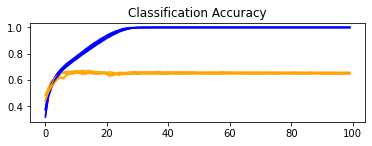

In [66]:
opt=SGD(lr=.01)
correr_todo()

# `lec07-Recurrent Neural Network`

**Parte Teórica**
1. ¿Qué es una Red Recurrente? Es un red que tiene ciclos donde va aprendiendo después de finalizar cada uno, almacena el parendizaje en una memoria lo cual le permite aprender en secuencia.
2. ¿Por qué esta Red es diferente a las que hemos visto antes? Porque utiliza memoria que le permite aprender más allá de las interacciones con cada input, además que las interacciones no son únicamente lineales hacia adelante hay interacción hacia los lados con las neuronas en lugar de hacerlo de forma individual.
3. ¿Qué problemas hay que solucionar para aplicar este tipo de Red? El Backpropagation pues al no ser líneal la interación se rompe. La otra es que los gradientes no desaparezcan, pues se tiene inestabilidad.
4. ¿Qué es LSTM y por qué se dice qué es más "inteligente" que las neuoronas de una Red Feed-Forward? Es una red recurrente que nos ayuda a evitar el problema del gradiente pues utiliza el backpropagation Through time. Utiliza bloques de memoria en lugar de neuronas.
Los bloques de memoria tiene componentes que la hacen más lista que un simple feed-forward, pues tiene puertas para controlar si la ifnormación viaja o no.


**Parte Práctica**
1. Utilicen el API Alpha Vantage y descarguen el tipo de Cambio Peso Méxicano-Dólar Americano. Frecuencia Diaria y utilicen el precio de Cierre.
```python
from alpha_vantage.foreignexchange import ForeignExchange
fx=ForeignExchange(key=avkey,output_format="pandas")
import os
avkey=os.environ["ALPHA_VANTAGE_KEY"]='60MP74RUOD4MUHKI'
fx=ForeignExchange(key=avkey,output_format="pandas")
data, metadata=fx.get_currency_exchange_daily("USD","MXN")
data["4. close"].plot()

```

2. De acuerdo a la visto en clase utilicen una Red LSTM, entrenen su modelo con los primeros 90 datos y pronostiquen los últimos 10 datos. 



3. Utilicen `mean_squared_error` para compilar y el Optimizador que deseen. 

4. Utilicen epochs= 10,000, batch_size=1

5. Calculen el RMSE Error Cuadrático Medio del Train y Score

6. Grafiquen su pronóstico en Train y Test. 

In [84]:
import os
from alpha_vantage.foreignexchange import ForeignExchange
import time
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

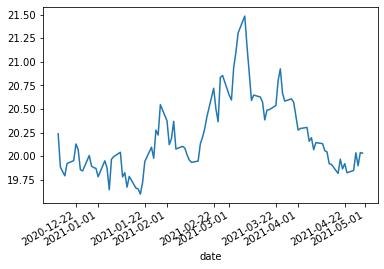

In [78]:
avkey=os.environ["ALPHA_VANTAGE_KEY"]='60MP74RUOD4MUHKI' 
fx=ForeignExchange(key=avkey,output_format="pandas")
data, metadata=fx.get_currency_exchange_daily("USD","MXN") 
data["4. close"].plot()

In [80]:
fx=data[["4. close"]]
fx

,4. close
date,
2021-04-30,20.03400
2021-04-29,20.04055
2021-04-28,19.90097
2021-04-27,20.03800
2021-04-26,19.85140
...,...
2020-12-18,19.92500
2020-12-17,19.79488
2020-12-16,19.83900


In [81]:
fx.index=pd.to_datetime(fx.index)
fx=fx.sort_index()
fx.head()

,4. close
date,
2020-12-14,20.23890
2020-12-15,19.88800
2020-12-16,19.83900
2020-12-17,19.79488
2020-12-18,19.92500


In [83]:
fx_np=fx.values.astype('float32')
fx_np

array([[20.2389 ],
       [19.888  ],
       [19.839  ],
       [19.79488],
       [19.925  ],
       [19.955  ],
       [20.131  ],
       [20.07253],
       [19.85855],
       [19.84606],
       [20.0095 ],
       [19.8981 ],
       [19.881  ],
       [19.87383],
       [19.78435],
       [19.953  ],
       [19.879  ],
       [19.647  ],
       [19.96989],
       [19.997  ],
       [20.04374],
       [19.783  ],
       [19.82755],
       [19.6746 ],
       [19.78875],
       [19.665  ],
       [19.6552 ],
       [19.60085],
       [19.72449],
       [19.94595],
       [20.0968 ],
       [19.98048],
       [20.27828],
       [20.2265 ],
       [20.5473 ],
       [20.3758 ],
       [20.1241 ],
       [20.18825],
       [20.371  ],
       [20.078  ],
       [20.10643],
       [20.08817],
       [20.01718],
       [19.962  ],
       [19.93715],
       [19.95   ],
       [20.133  ],
       [20.204  ],
       [20.29755],
       [20.425  ],
       [20.7206 ],
       [20.50378],
       [20.3

In [87]:
len(fx_np)

100

In [85]:
scaler=MinMaxScaler(feature_range=(0,1))
fx_np=scaler.fit_transform(fx_np)

In [88]:
train_size=int(len(fx_np)*.9)
test_size=len(fx_np)-train_size
train,test=fx_np[0:train_size,:], fx_np[train_size:len(fx_np),:]

In [90]:
test_size

10

In [91]:
def create_dataset(dataset,look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [92]:
look_back=1
trainX,trainY=create_dataset(train,look_back)
testX,testY=create_dataset(test,look_back)

In [95]:
trainX,trainY

(array([[0.33874226],
        [0.15244961],
        [0.12643528],
        [0.10301113],
        [0.17209244],
        [0.18801975],
        [0.28145885],
        [0.25041676],
        [0.13681316],
        [0.13018322],
        [0.21695423],
        [0.15781116],
        [0.14873314],
        [0.14492702],
        [0.09742069],
        [0.18695736],
        [0.14767075],
        [0.02450085],
        [0.19592476],
        [0.21031761],
        [0.23513126],
        [0.09670448],
        [0.12035656],
        [0.03915501],
        [0.09975624],
        [0.03405762],
        [0.02885437],
        [0.        ],
        [0.06564045],
        [0.18321514],
        [0.26330185],
        [0.20154667],
        [0.3596506 ],
        [0.33216   ],
        [0.50247383],
        [0.41142368],
        [0.27779484],
        [0.31185246],
        [0.40887547],
        [0.2533207 ],
        [0.2684145 ],
        [0.25871944],
        [0.22103119],
        [0.19173622],
        [0.17854214],
        [0

In [97]:
trainX.shape

(88, 1)

In [98]:
trainX=np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))
testX=np.reshape(testX,(testX.shape[0],1,testX.shape[1]))

In [99]:
trainX

array([[[0.33874226]],

       [[0.15244961]],

       [[0.12643528]],

       [[0.10301113]],

       [[0.17209244]],

       [[0.18801975]],

       [[0.28145885]],

       [[0.25041676]],

       [[0.13681316]],

       [[0.13018322]],

       [[0.21695423]],

       [[0.15781116]],

       [[0.14873314]],

       [[0.14492702]],

       [[0.09742069]],

       [[0.18695736]],

       [[0.14767075]],

       [[0.02450085]],

       [[0.19592476]],

       [[0.21031761]],

       [[0.23513126]],

       [[0.09670448]],

       [[0.12035656]],

       [[0.03915501]],

       [[0.09975624]],

       [[0.03405762]],

       [[0.02885437]],

       [[0.        ]],

       [[0.06564045]],

       [[0.18321514]],

       [[0.26330185]],

       [[0.20154667]],

       [[0.3596506 ]],

       [[0.33216   ]],

       [[0.50247383]],

       [[0.41142368]],

       [[0.27779484]],

       [[0.31185246]],

       [[0.40887547]],

       [[0.2533207 ]],

       [[0.2684145 ]],

       [[0.25871

In [101]:
model=Sequential()
model.add(LSTM(4,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(trainX,trainY,epochs=10000,batch_size=1,verbose=0)

In [102]:
trainPredict=model.predict(trainX)
testPredict=model.predict(testX)

In [103]:
trainPredict=scaler.inverse_transform(trainPredict)
trainY=scaler.inverse_transform([trainY])
testPredict=scaler.inverse_transform(testPredict)
testY=scaler.inverse_transform([testY])

In [104]:
trainScore=math.sqrt(mean_squared_error(trainY[0],trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore=math.sqrt(mean_squared_error(testY[0],testPredict[:,0]))
print('Train Score: %.2f RMSE' % (testScore))

Train Score: 0.16 RMSE
Train Score: 0.11 RMSE


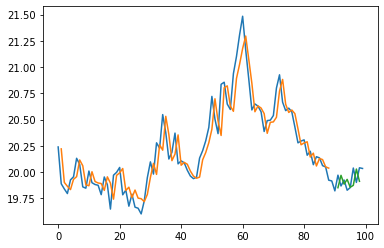

In [112]:

trainPredictPlot=np.empty_like(fx_np)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back,:]=trainPredict
testPredictPlot=np.empty_like(fx_np)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(fx_np)-1,:]=testPredict
plt.plot(scaler.inverse_transform(fx_np))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()